In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Define the path to the dataset
p = Path(r"C:\Users\abhin\OneDrive\Desktop\Dataset")

# Get all directories within the dataset path
dirs = p.glob("*")

# Print the directories
for d in dirs:
    print(d)

C:\Users\abhin\OneDrive\Desktop\Dataset\Bulbasaur
C:\Users\abhin\OneDrive\Desktop\Dataset\Meowth
C:\Users\abhin\OneDrive\Desktop\Dataset\Pikachu


In [3]:
# Re-initialize dirs for later use
dirs = p.glob("*")

# Initialize lists to store data and labels
image_data = []
labels = []
# Optional
image_paths = []
labels_dict = {"Pikachu": 0, "Bulbasaur": 1, "Meowth": 2}  

# Loop through each directory
for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    cnt = 0
    print(folder_dir)

    # Loop through each image in the directory
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path, target_size=(100, 100))
        img_array = image.img_to_array(img)  # Convert image to array
        image_data.append(img_array)
        labels.append(labels_dict[label])
        image_paths.append(img_path)  # Optional: store image paths
        cnt += 1
    print(cnt)

# Convert image_data and labels to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)

print(f"Total images: {len(image_data)}")
print(f"Total labels: {len(labels)}")

C:\Users\abhin\OneDrive\Desktop\Dataset\Bulbasaur
176
C:\Users\abhin\OneDrive\Desktop\Dataset\Meowth
70
C:\Users\abhin\OneDrive\Desktop\Dataset\Pikachu
199
Total images: 445
Total labels: 445


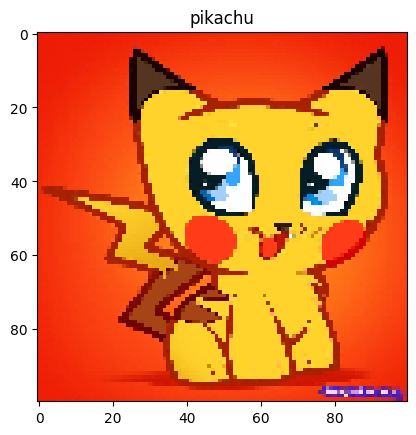

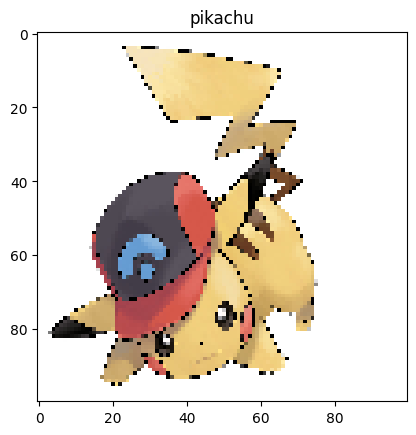

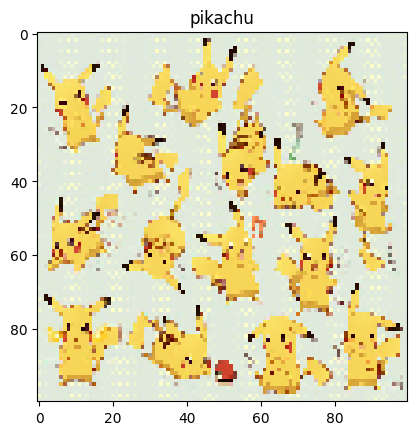

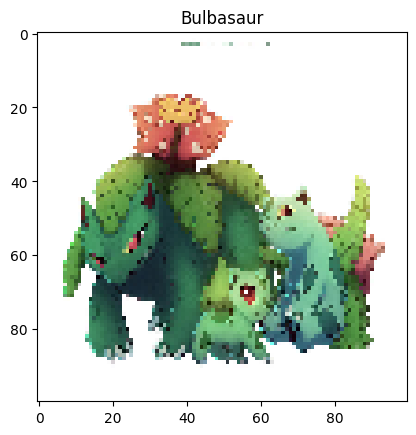

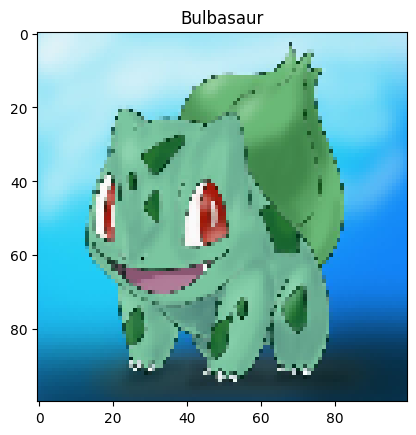

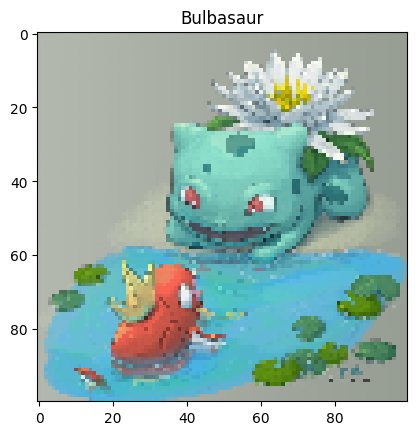

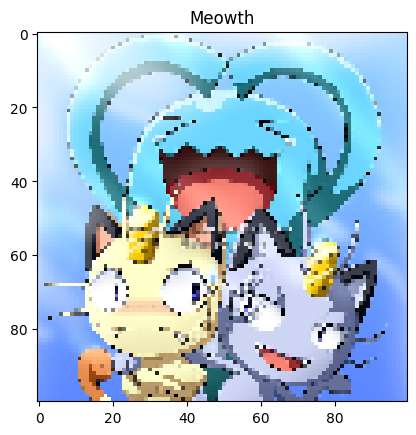

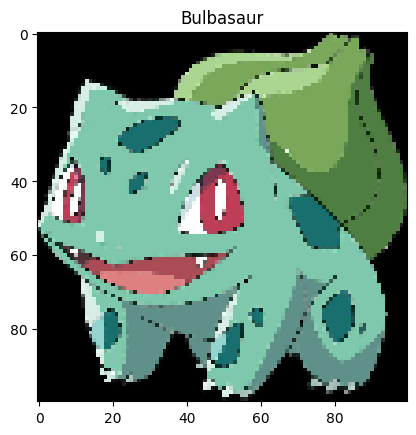

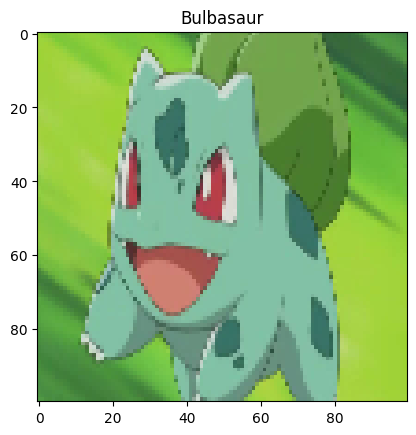

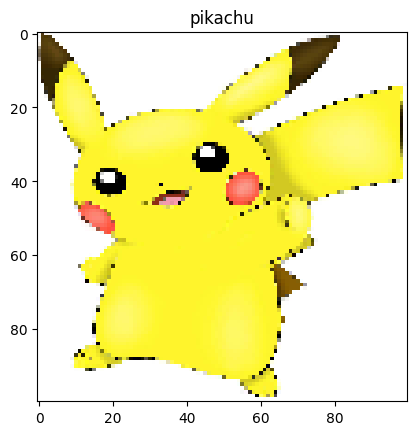

In [4]:

# Assuming labels_dict is defined as before
labels_dict = {"pikachu": 0, "Bulbasaur": 1, "Meowth": 2}
# Create a reverse mapping from labels_dict
label2pokemon = {v: k for k, v in labels_dict.items()}
 
# Visualization function
def drawImg(img, label):
    plt.title(label2pokemon[label])  # Corrected case to label2pokemon
    plt.imshow(img)
    plt.show()
for i in range(10):
    r = np.random.randint(len(image_data))
    normalized_image = image_data[r] / 255.0  # Normalize the selected image
    drawImg(normalized_image, labels[r])

In [5]:
# Convert to numpy arrays if they are not already
x_ = np.array(image_data)
y_ = np.array(labels)

# Determine the split index
split = int(x_.shape[0] * 0.8)

# Training set
x_train = x_[:split, :]
y_train = y_[:split]

# Test set
x_test = x_[split:, :]
y_test = y_[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)



(356, 100, 100, 3) (356,)
(89, 100, 100, 3) (89,)


In [6]:
class NeuralNetwork:
    def __init__(self, input_size, layers, output_size):
        # Set the seed for reproducibility
        np.random.seed(0)
        
        # Initialize the model as a dictionary to store weights and biases
        self.model = {}
        
        # First layer: weights and biases
        self.model['w1'] = np.random.randn(input_size, layers[0])
        self.model['b1'] = np.zeros((1, layers[0]))
        
        # Second layer: weights and biases
        self.model['w2'] = np.random.randn(layers[0], layers[1])
        self.model['b2'] = np.zeros((1, layers[1]))
        
        # Third layer: weights and biases
        self.model['w3'] = np.random.randn(layers[1], output_size)
        self.model['b3'] = np.zeros((1, output_size))
    
    def forward(self, x):
        # First layer: Affine transformation and ReLU activation
        z1 = np.dot(x, self.model['w1']) + self.model['b1']
        a1 = self.relu(z1)
        
        # Second layer: Affine transformation and ReLU activation
        z2 = np.dot(a1, self.model['w2']) + self.model['b2']
        a2 = self.relu(z2)
        
        # Third layer: Affine transformation and softmax activation
        z3 = np.dot(a2, self.model['w3']) + self.model['b3']
        y_hat = self.softmax(z3)
        
        return y_hat

    def relu(self, x):
        # ReLU activation function
        return np.maximum(0, x)
    
    def softmax(self, a):
        # Softmax activation function
        exp_a = np.exp(a - np.max(a, axis=1, keepdims=True))
        return exp_a / np.sum(exp_a, axis=1, keepdims=True)
    
    def loss(self, y_hat, y_true):
        # Calculate the categorical cross-entropy loss
        m = y_true.shape[0]
        log_likelihood = -np.log(y_hat[range(m), y_true])
        loss = np.sum(log_likelihood) / m
        return loss

    def one_hot(self, y, num_classes):
        # Convert integer class labels to one-hot encoded vectors
        m = y.shape[0]
        one_hot_labels = np.zeros((m, num_classes))
        one_hot_labels[np.arange(m), y] = 1
        return one_hot_labels
    
    def train(self, x_train, y_train, epochs=100, lr=0.01):
        m = x_train.shape[0]  # Number of training examples
        losses = []  # To store the loss after each epoch
        
        for epoch in range(epochs):
            # Forward propagation: Predict outputs
            y_hat = self.forward(x_train)
            
            # Compute loss
            loss = self.loss(y_hat, y_train)
            losses.append(loss)
            
            # Backpropagation
            delta3 = y_hat - self.one_hot(y_train, y_hat.shape[1])
            dw3 = np.dot(self.relu(np.dot(x_train, self.model['w2']) + self.model['b2']).T, delta3)
            db3 = np.sum(delta3, axis=0, keepdims=True)
            
            delta2 = np.dot(delta3, self.model['w3'].T) * (self.relu(np.dot(x_train, self.model['w2']) + self.model['b2']) > 0)
            dw2 = np.dot(self.relu(np.dot(x_train, self.model['w1']) + self.model['b1']).T, delta2)
            db2 = np.sum(delta2, axis=0)
            
            delta1 = np.dot(delta2, self.model['w2'].T) * (self.relu(np.dot(x_train, self.model['w1']) + self.model['b1']) > 0)
            dw1 = np.dot(x_train.T, delta1)
            db1 = np.sum(delta1, axis=0)
            
            # Gradient descent: Update weights and biases
            self.model['w1'] -= lr * dw1 / m
            self.model['b1'] -= lr * db1 / m
            self.model['w2'] -= lr * dw2 / m
            self.model['b2'] -= lr * db2 / m
            self.model['w3'] -= lr * dw3 / m
            self.model['b3'] -= lr * db3 / m
            
            # Print loss every 10 epochs
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
        
        return losses
